In [1]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free
# software machine learning library for the Python programming language.
# It features various classification, regression and clustering algorithms,
# and is designed to interoperate with the Python numerical and scientific
# libraries NumPy and SciPy. (from wiki)
#!pip install scikit-learn
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble


import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#!pip install plotly
#!pip install seaborn
#!pip install tensorflow

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML


#! pip install dtreeviz==1.4.0

from dtreeviz.trees import dtreeviz



2023-11-23 14:47:30.274780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:


df_diabetes_preprocessed=pd.DataFrame(pd.read_csv('sample_data/diabetes_preprocessed_correct.csv'))
df_diabetes_preprocessed.head()
df_diabetes_preprocessed.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
756,0,162,76,56,100,53.2,0.759,25,1
757,1,88,30,42,99,55.0,0.496,26,1
758,3,123,100,35,240,57.3,0.880,22,0
759,0,180,78,63,14,59.4,2.420,25,1
760,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df_diabetes=pd.DataFrame(pd.read_csv('sample_data/diabetes_7_lines_removed.csv'))
# try removed all entries with 0 insulin values and the replace by the median the other factors
df_diabetes_preprocessed_insulin = df_diabetes[df_diabetes['Insulin'] != 0].copy()

#df_diabetes
df_diabetes_preprocessed_insulin
print(df_diabetes_preprocessed_insulin.isnull().sum())

df_diabetes_preprocessed_insulin['BloodPressure'].replace(0, df_diabetes_preprocessed_insulin['BloodPressure'].median(), inplace=True)
df_diabetes_preprocessed_insulin['Glucose'].replace(0, df_diabetes_preprocessed_insulin['Glucose'].median(), inplace=True)
df_diabetes_preprocessed_insulin['BMI'].replace(0, df_diabetes_preprocessed_insulin['BMI'].median(), inplace=True)
df_diabetes_preprocessed_insulin['SkinThickness'].replace(0, df_diabetes_preprocessed_insulin['SkinThickness'].median(), inplace=True)
print(df_diabetes_preprocessed_insulin.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# create the list  of features and outcomes for labelling graphs later

features = ['Pregnancies',
                  'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
                  ]

Output_names = ['Non-diabetes', 'Diabetes']

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 8.5374 - accuracy: 0.4369 - val_loss: 5.7563 - val_accuracy: 0.6557
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 4.7885 - accuracy: 0.5740 - val_loss: 3.7573 - val_accuracy: 0.6230
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 3.8481 - accuracy: 0.5009 - val_loss: 2.1794 - val_accuracy: 0.5902
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 3.3453 - accuracy: 0.5448 - val_loss: 2.0046 - val_accuracy: 0.6066
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 3.0465 - accuracy: 0.5320 - val_loss: 1.1251 - val_accuracy: 0.5082
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 2.3709 - accuracy: 0.5686 - val_loss: 1.0727 - val_accuracy: 0.6557
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 2.2764 - accuracy: 0.5905 - val_loss: 0.8741 - val_accuracy: 0.6230
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.6856 - val_loss: 0.6246 - val_accuracy: 0.7049
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6327 - accuracy: 0.6837 - val_loss: 0.5709 - val_accuracy: 0.6885
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6892 - val_loss: 0.5628 - val_accuracy: 0.7213
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6856 - val_loss: 0.5632 - val_accuracy: 0.7213
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.7020 - val_loss: 0.5743 - val_accuracy: 0.7213
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.7148 - val_loss: 0.5710 - val_accuracy: 0.7377
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7112 - val_loss: 0.5442 - val_accuracy: 0.7377
Epoch 

Text(0.5, 1.0, 'val_accuracy')

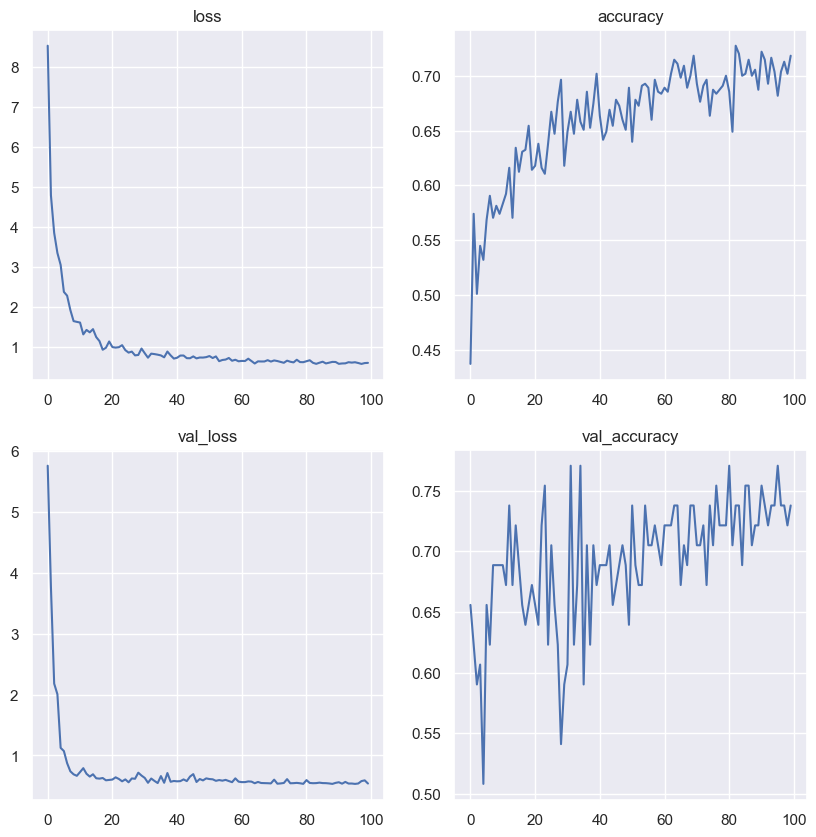

In [14]:
#neuronal networks
#reload the dataframe
df = df_diabetes_preprocessed 
#df= df_diabetes_preprocessed_insulin
# Assuming 'x' contains features and 'y' contains labels
x = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Labels

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



import tensorflow as tf

# Create a Sequential model
model = tf.keras.models.Sequential()

# Add layers to the Sequential model
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.2))  # Optional dropout for regularization
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', 
               metrics=['accuracy'], loss='binary_crossentropy')

# Train the model
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

print(hist.history)
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].plot(hist.epoch, hist.history['loss'])
axs[0,0].set_title('loss')
axs[0,1].plot(hist.epoch, hist.history['accuracy'])
axs[0,1].set_title('accuracy')
axs[1,0].plot(hist.epoch, hist.history['val_loss'])
axs[1,0].set_title('val_loss')
axs[1,1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1,1].set_title('val_accuracy')


Epoch 1/200
18/18 [==============================] - 1s 12ms/step - loss: 6.9576 - accuracy: 0.5229 - val_loss: 1.4471 - val_accuracy: 0.5246
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 4.8657 - accuracy: 0.5174 - val_loss: 1.3612 - val_accuracy: 0.7213
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 3.3124 - accuracy: 0.5631 - val_loss: 0.7229 - val_accuracy: 0.7869
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 2.5875 - accuracy: 0.5795 - val_loss: 0.9143 - val_accuracy: 0.7377
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 2.1463 - accuracy: 0.5777 - val_loss: 1.0101 - val_accuracy: 0.6230
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 1.7938 - accuracy: 0.6453 - val_loss: 0.9874 - val_accuracy: 0.6230
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 1.7271 - accuracy: 0.5978 - val_loss: 1.1159 - val_accuracy: 0.7049
Epoch 8/200


Epoch 59/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.6929 - val_loss: 0.5463 - val_accuracy: 0.7869
Epoch 60/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.6984 - val_loss: 0.5545 - val_accuracy: 0.8197
Epoch 61/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5977 - accuracy: 0.6965 - val_loss: 0.5527 - val_accuracy: 0.7705
Epoch 62/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7112 - val_loss: 0.5489 - val_accuracy: 0.7541
Epoch 63/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.6965 - val_loss: 0.5516 - val_accuracy: 0.7705
Epoch 64/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.7002 - val_loss: 0.5415 - val_accuracy: 0.7869
Epoch 65/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.7221 - val_loss: 0.5521 - val_accuracy: 0.8033
Epoch 

18/18 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7331 - val_loss: 0.5149 - val_accuracy: 0.7869
Epoch 117/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.7112 - val_loss: 0.5063 - val_accuracy: 0.7869
Epoch 118/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5400 - accuracy: 0.7313 - val_loss: 0.5013 - val_accuracy: 0.7869
Epoch 119/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.7203 - val_loss: 0.5006 - val_accuracy: 0.7869
Epoch 120/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5537 - accuracy: 0.7112 - val_loss: 0.5064 - val_accuracy: 0.7869
Epoch 121/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.7239 - val_loss: 0.5054 - val_accuracy: 0.7869
Epoch 122/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7203 - val_loss: 0.5037 - val_accuracy: 0.7869
Epoch 123/200

18/18 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7477 - val_loss: 0.4774 - val_accuracy: 0.8525
Epoch 174/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7386 - val_loss: 0.4752 - val_accuracy: 0.7705
Epoch 175/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7313 - val_loss: 0.4781 - val_accuracy: 0.8197
Epoch 176/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7349 - val_loss: 0.4767 - val_accuracy: 0.7869
Epoch 177/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7294 - val_loss: 0.4842 - val_accuracy: 0.7869
Epoch 178/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7422 - val_loss: 0.4750 - val_accuracy: 0.7705
Epoch 179/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7294 - val_loss: 0.4853 - val_accuracy: 0.7705
Epoch 180/200

Text(0.5, 1.0, 'val_accuracy')

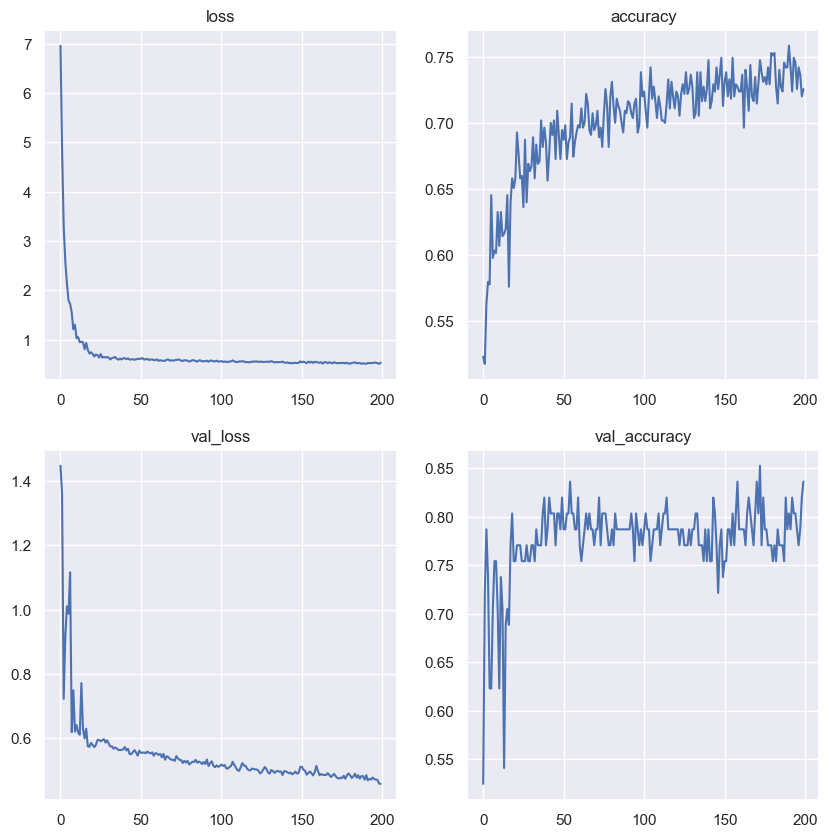

In [15]:
# Example: increasing model capacity

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'], loss='binary_crossentropy')
# Train the model
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1)


# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

print(hist.history)
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].plot(hist.epoch, hist.history['loss'])
axs[0,0].set_title('loss')
axs[0,1].plot(hist.epoch, hist.history['accuracy'])
axs[0,1].set_title('accuracy')
axs[1,0].plot(hist.epoch, hist.history['val_loss'])
axs[1,0].set_title('val_loss')
axs[1,1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1,1].set_title('val_accuracy')


